# Analisis para saber si se van a alinear o se pueden alinear adecuadamente los candidatos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
sys.path.append('../math_tricks/')
import funciones_CLICK as fc
%matplotlib inline

In [23]:
new_df_cliques1 = pd.read_pickle('../clique1.pkl')
new_df_cliques2 = pd.read_pickle('../clique2.pkl')

candidatos = pd.read_csv('../candidatos.csv')

# max_clique1 = pd.read_csv('../clique1_maximal.csv')
# max_clique2 = pd.read_csv('../clique2_maximal.csv')

df_atoms1 = pd.read_pickle('../clique1_df_atributos.pkl')
df_atoms2 = pd.read_pickle('../clique2_df_atributos.pkl')

rmsd = pd.read_pickle("../rmsd_picke.pkl").reset_index(drop=True)
# rmsd.columns = ['rmsd','candidatos','matriz_de_rotacion']

In [24]:
# new_df_cliques1['baricentro_array'] = [np.array(
#     new_df_cliques1.baricentro_clique.values[i][1:-1].split()).astype(
#     float) for i in new_df_cliques1.index]

# new_df_cliques2['baricentro_array'] = [np.array(
#     new_df_cliques2.baricentro_clique.values[i][1:-1].split()).astype(
#     float) for i in new_df_cliques2.index]

In [25]:
# df_atoms1['vector_array'] = [np.array(
#     df_atoms1.vector.values[i][1:-1].split()).astype(
#     float) for i in df_atoms1.index]

# df_atoms2['vector_array'] = [np.array(
#     df_atoms2.vector.values[i][1:-1].split()).astype(
#     float) for i in df_atoms2.index]

In [26]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques1.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms1.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 86.6 ms, sys: 24 ms, total: 111 ms
Wall time: 110 ms


In [43]:
vectores_gorro_proteina_1 = pd.DataFrame(lista_vectores_gorro)

In [44]:
%%time
lista_vectores_gorro = []
for i,bari in enumerate(new_df_cliques2.baricentro_clique.values):
    lista_pre_vectores = []
#     if i < 5:
    for coord in df_atoms2.vector.values:
#             print(bari,coord)
        lista_pre_vectores.append(coord - bari)
#             print('aa'*20)
    lista_vectores_gorro.append(lista_pre_vectores)

CPU times: user 177 ms, sys: 8.24 ms, total: 185 ms
Wall time: 183 ms


In [45]:
vectores_gorro_proteina_2 = pd.DataFrame(lista_vectores_gorro)

1.2341284825778507
1.263145425274225


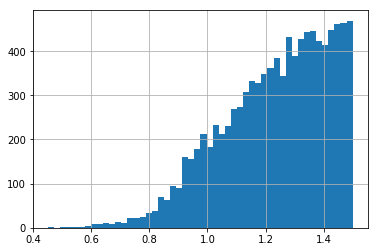

In [32]:
rmsd.rmsd.hist(bins=50)
print(rmsd.rmsd.mean())
print(rmsd.rmsd.median())

# Alineamiento de uno

In [28]:
# candidato que obtuve menor RMSD
rmsd.iloc[rmsd.rmsd.idxmin()]

rmsd                 0.45230                                                                                                                                                                                              
candidatos            (130, 246)                                                                                                                                                                                          
matriz_rotacion       [[-0.9981044702490018, -0.05787511317018723, 0.020926962142113023], [0.01671782684590115, 0.0722790235411484, 0.9972443316567353], [-0.05922820894227579, 0.9957038786865683, -0.07117447038098695]]
candidato_clique_1    130                                                                                                                                                                                                 
candidato_clique_2    246                                                                                                   

In [50]:
# Atributos del clique 1 de la proteina 1
new_df_cliques1.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_1].head()

0   145.00000
1   146.00000
2   147.00000
3   148.00000
4   149.00000
Name: 130, dtype: object

In [51]:
# Atributos del clique 2 de la proteina 2
new_df_cliques2.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_2].head()

0   100.00000
1   101.00000
2   102.00000
3   103.00000
4   104.00000
Name: 246, dtype: object

In [52]:
# vectores gorro de la proteina 1
vectores_gorro_proteina_1.iloc[130].head()

0    [9.193000000000001, -4.62828571428571, 6.91714285714286]  
1    [9.755000000000003, -5.12828571428571, 5.674142857142858] 
2    [8.824000000000002, -4.712285714285713, 4.53914285714286] 
3    [7.602, -4.7542857142857144, 4.67914285714286]            
4    [9.905000000000001, -6.659285714285716, 5.738142857142858]
Name: 130, dtype: object

In [53]:
# vectores gorro de la proteina 2
vectores_gorro_proteina_2.iloc[246].head()

0    [17.24214285714286, -7.589142857142856, 23.395142857142854] 
1    [16.450142857142858, -7.487142857142856, 24.685142857142857]
2    [15.287142857142857, -6.498142857142856, 24.476142857142854]
3    [14.202142857142857, -6.630142857142856, 25.042142857142856]
4    [17.363142857142858, -7.030142857142856, 25.865142857142857]
Name: 246, dtype: object

In [55]:
# proteina 1
df_atoms1.shape

(532, 5)

In [56]:
# proteina 2
df_atoms2.shape

(878, 5)

In [ ]:
def rotation_vectors(vector_gorro, matriz_rotacion):
    """obtencion de vector rotado,
    utilizando la matriz de rotacion
    y los vectores gorro a rotar y trasladar"""

    coord_rotado_trasladado = [np.matmul(
        matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]
    return (coord_rotado_trasladado)

In [61]:
# se obtiene la matriz de rotacion del menor rmsd
# se aplica a todos los vectores gorro de la proteina 1 que ya se le quito el baricentro del candidato 1
matriz_rotacion = rmsd.iloc[rmsd.rmsd.idxmin()].matriz_rotacion
vector_gorro = vectores_gorro_proteina_1.iloc[130].values
#se obtienen coordendas rotadas
coord_vectores_rotados = [np.matmul(matriz_rotacion, i.reshape(3, 1)).T[0] for i in vector_gorro]

In [62]:
# las coordenadas anteriores se le suma el baricentro del candidato seleccionado de la proteina 2
baricentro_proteina_2 = new_df_cliques2.iloc[rmsd.iloc[rmsd.rmsd.idxmin()].candidato_clique_2].baricentro_clique
vector_rotado_trasladado_a_clique2 = coord_vectores_rotados + baricentro_proteina_2 #nuevas coordendas proteina 1

In [75]:
df_atoms2['x'] = [i[0] for i in df_atoms2.vector]
df_atoms2['y'] = [i[1] for i in df_atoms2.vector]
df_atoms2['z'] = [i[2] for i in df_atoms2.vector]

In [91]:
new_df_atom1 = pd.concat([df_atoms1,pd.DataFrame(vector_rotado_trasladado_a_clique2,columns=['x','y','z'])],1)
new_df_atom1.head()
new_df_atom1[['atom_name','x','y','z']].to_csv('1xxa_rot_tras.xyz',sep=' ',header=False,index=False)

In [92]:
df_atoms2.head()
df_atoms2[['atom_name','x','y','z']].to_csv('1tig.xyz',sep=' ',header=False,index=False)

In [1]:
# np.array(rmsd['2'].values[0].split('\n')[0][3:-1].split(), dtype=float) for i in rmsd['2'].shape[0]

In [2]:
# for i, val in enumerate(new_df_cliques1.baricentro_array.values):
#     # se recorre la tabla por indice y valor del baricentro
#     data = [new_df_cliques1.iloc[i, j] for j in range(indice_num_cliques_1, indice_num_cliques_2)]
#     # se extrae las columnas de las coordenadas de los cliques
#     for n, k in enumerate(data):
#         vectors = (k - val)  # se le resta el baricentro a cada coordenada de clique

In [98]:
new_df_atom1['new_vector'] = [ [new_df_atom[i]['x'],new_df_atom[i]['x'],new_df_atom[i]['x']] for i in range(new_df_atom1.shape[0]]
new_df_atom1

TypeError: 'int' object is not iterable

In [96]:
new_df_atom1

,atom_number,atom_name,residue_name,residue_number,vector,x,y,z
0,1,N,LEU,82,"[28.39, 57.093, 26.056]",-3.91110,15.90738,-5.00935
1,2,CA,LEU,82,"[28.952, 56.593, 24.813]",-4.46911,14.64106,-5.45202
2,3,C,LEU,82,"[28.021, 57.009, 23.678]",-3.58770,13.52370,-4.90188
3,4,O,LEU,82,"[26.799, 56.967, 23.818]",-2.36266,13.63985,-4.88129
4,5,CB,LEU,82,"[29.102, 55.062, 24.877]",-4.52888,14.59674,-6.98988
5,6,CG,LEU,82,"[30.441, 54.438, 24.445]",-5.83827,14.14321,-7.65976
6,7,CD1,LEU,82,"[30.685, 53.135, 25.218]",-5.99022,14.82398,-9.02663
7,8,CD2,LEU,82,"[30.483, 54.202, 22.935]",-5.89813,12.62102,-7.78976
8,9,N,LYS,83,"[28.613, 57.383, 22.548]",-4.22387,12.43374,-4.48413
9,10,CA,LYS,83,"[27.877, 57.84, 21.376]",-3.54024,11.28570,-3.90208
